In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [18]:
# Load the CSV file into a DataFrame
df = pd.read_csv('../processed_data.csv')


In [19]:
# Separate the male and female populations
male_df = df[df['sex'] == 'male']
female_df = df[df['sex'] == 'female']

# Randomly sample from the male population to match the size of the female population
sampled_male_df = male_df.sample(n=len(female_df), random_state=42)

# Combine the sampled male population with the female population
balanced_df = pd.concat([sampled_male_df, female_df])

# Shuffle the combined dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


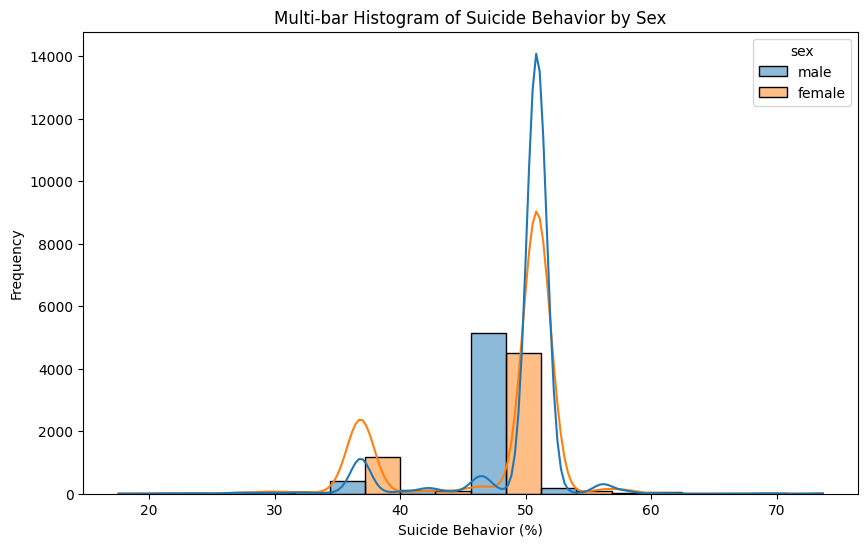

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=balanced_df, x='suicide_behavior', hue='sex', multiple='dodge', bins=10, kde=True)
plt.title('Multi-bar Histogram of Suicide Behavior by Sex')
plt.xlabel('Suicide Behavior (%)')
plt.ylabel('Frequency')
plt.show()

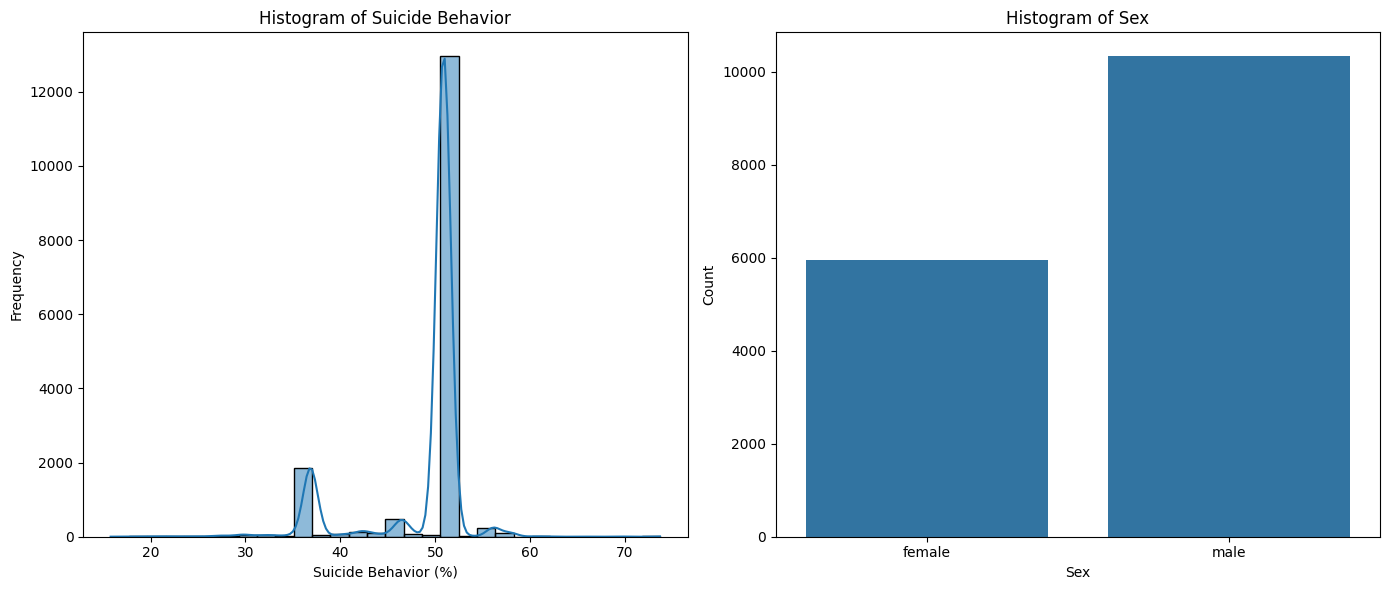

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for suicide_behavior
sns.histplot(df['suicide_behavior'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Suicide Behavior')
ax[0].set_xlabel('Suicide Behavior (%)')
ax[0].set_ylabel('Frequency')

# Plot histogram for sex
sns.countplot(x='sex', data=df, ax=ax[1])
ax[1].set_title('Histogram of Sex')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()